# Natural Language Processing (NLP)

## Types of NLP

<img src='../resources/nlp/types.png' />

### Bag of Words model


**Yes / No**

If we put 20,000 words in a vector:
<img src='../resources/nlp/bag_of_words1.png' />

Assign into positions:
<img src='../resources/nlp/bag_of_words2.png' />

We train the data:
<img src='../resources/nlp/bag_of_words4.png' />

Convert each sentence into a vector
<img src='../resources/nlp/bag_of_words5.png' />

<hr />

### Implementing NLP - Bag of Words

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Preparation

In [2]:
df = pd.read_csv('data/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [3]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [47]:
import re # Regular Expression
import nltk # Cleaning the nl text
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer # Root of the word, keep present tense

corpus = [] # All reviews from dataset but all cleaned

stopwords_altered = stopwords.words('english')
stopwords_altered.remove('not') # remove 'not' from stopwords

# Cleaning process
for i in range(0, len(df['Review'])):
    # Remove all punctuations
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review = review.split() # For stemming
    
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords_altered)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\linta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
corpus[:10]

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

### Creating Bag of Words model

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

# Tokenization process
# max_features - Help to remove unnecessary words
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray() # makes it 2D array
y = df['Liked'].values

In [61]:
# Find number of columns in X, number of words from tokenization
len(X[0, :])

1500

In [62]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Using Naive Bayes model

In [63]:
from sklearn.naive_bayes import GaussianNB

cls = GaussianNB()
cls.fit(X_train, y_train)

GaussianNB()

### Predictions

In [64]:
y_preds = cls.predict(X_test)

### Evaluations

In [66]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

accuracy_score(y_test, y_preds)

0.67

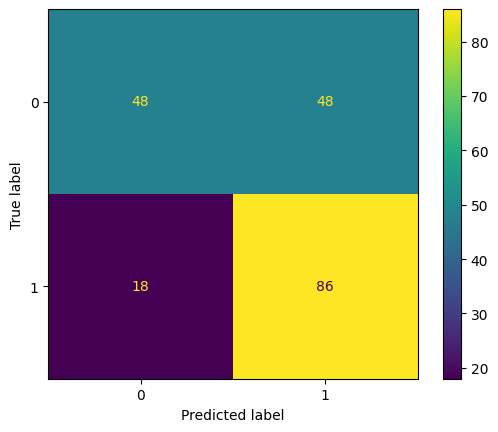

In [67]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

In [68]:
pd.DataFrame(classification_report(y_test, y_preds, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.727273,0.641791,0.67,0.684532,0.682822
recall,0.500000,0.826923,0.67,0.663462,0.670000
f1-score,0.592593,0.722689,0.67,0.657641,0.660243
support,96.000000,104.000000,0.67,200.000000,200.000000
